In [1]:
import sys
import os
from os.path import dirname, realpath, join
base_dir = dirname(dirname(os.getcwd()))
import itertools
import pandas as pd
from os.path import join
base_dir

sys.path.insert(0, base_dir)
from config_path import PROSTATE_DATA_PATH, PLOTS_PATH, GENE_PATH, PROSTATE_LOG_PATH, BASE_PATH
from data.data_access import Data

In [2]:
import pandas as pd
from os.path import join
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import matplotlib.patches as mpatches
import seaborn as sns

In [3]:
def sigmoid(x, L ,k, x0):
    b=0.
    c = -k*(x-x0)
#     print c
    a= np.exp(c)
    y = L / (1. + a )+b
    return (y)

In [4]:
filename = join(PROSTATE_DATA_PATH, 'functional/Data S3 CRISPR and RO-5963 results.xlsx')
df = pd.read_excel(filename, sheet_name='RO drug curves', header=[0,1], index_col=0)
cols= ['LNCaP']*6 +['PC3']*6 +['DU145']*6

In [6]:
df.head()

LNCaP                                                         PC3  \
RO-5963         1         2         3         4         5         6         1   
0.001    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
0.080    1.167785  1.194631  0.806452  0.965368  1.144144  1.240260  0.842105   
0.400    0.912752  0.986577  1.019355  0.757576  0.909910  1.590909  0.879699   
2.000    0.543624  0.496644  0.406452  0.593074  0.486486  0.727273  0.736842   
10.000   0.040268  0.087248  0.077419  0.116883  0.058559  0.084416  0.819549   

                                                              DU145            \
RO-5963         2         3         4         5         6         1         2   
0.001    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
0.080    1.079646  1.188034  1.000000  0.884298  0.828767  0.882353  0.837438   
0.400    1.415929  1.017094  1.075630  1.314050  0.828767  0.995098  1.083744   
2.000    1.150442  1.017094  0.789916  0.991736  0.780822  1.049020  1.054187   
10.000   1.283186  0.982906  1.151261  0.917355  0.616438  0.901961  1.177340   

                                                 
RO-5963         3         4         5         6  
0.001    1.000000  1.000000  1.000000  1.000000  
0.080    0.995192  1.355263  1.049057  0.800000  
0.400    0.802885  1.565789  0.962264  0.817857  
2.000    1.076923  1.519737  1.011321  0.732143  
10.000   0.889423  1.322368  1.030189  0.953571

['LNCaP', 'PC3', 'DU145']
LNCaP
(36,) (36,)
<type 'numpy.ndarray'> <type 'numpy.ndarray'>
[ 6.68441589e+03 -2.84655555e-01 -3.07022167e+01]
PC3
(36,) (36,)
<type 'numpy.ndarray'> <type 'numpy.ndarray'>
[ 1.01447956 -0.12637104 31.67597354]
DU145
(36,) (36,)
<type 'numpy.ndarray'> <type 'numpy.ndarray'>
[ 1.02883742 -0.60544549 46.38662482]


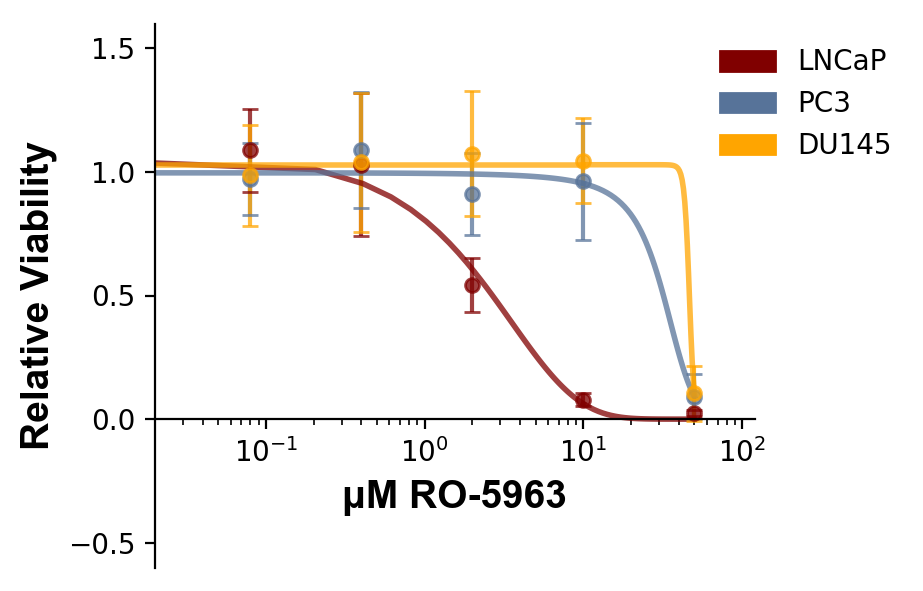

In [7]:
exps=['LNCaP', 'PC3', 'DU145']
print exps
colors={'LNCaP':'maroon', 'PC3':'#577399', 'DU145':'orange'}
from sklearn import preprocessing

fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(5,4), dpi=200)

    
X= df.index.values
legend_labels=[]
legnds=[]
for i, exp in enumerate(exps):
    print exp
    legend_labels.append(exp)
    df_exp = df[exp].copy()
    stdv = df_exp.std(axis=1)
    mean = df_exp.mean(axis=1)
    ydata=df_exp.values.flatten()
    xdata = np.repeat(X, 6)
    p0 = [1.0, -1., -.7]  # initial guess
    print xdata.shape, ydata.shape
    print type(xdata), type(ydata)
    popt, pcov = curve_fit(sigmoid, xdata, ydata, p0,method='dogbox', maxfev=60000)
    print popt
    plt.errorbar(X,mean,yerr=stdv,fmt='o',ms=5,color=colors[exp],alpha=0.75,capsize=3, label=exp)
    x2= np.linspace((min(xdata), max(xdata)), 10)
    y2 = sigmoid( x2, *popt)
    plt.plot(x2,y2,color=colors[exp],alpha=0.75, linewidth=2)

    legnds.append(mpatches.Patch(color=colors[exp], label=exp))

plt.xscale('log')
plt.ylim((-.6, 1.6))
plt.subplots_adjust(left=0.2, bottom=0.2, right=0.8)
plt.ylabel('Relative Viability',fontdict=dict(family='Arial', weight='bold', fontsize=14) )
plt.xlabel(u'\u03bcM RO-5963',fontdict=dict(family='Arial', weight='bold', fontsize=14) )
ax.spines['bottom'].set_position(('data',  0.))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.yticks([-0.5, 0.0, 0.5, 1.0, 1.5])
plt.xlim((.02,120))

ax.legend( handles=legnds, bbox_to_anchor=(.9, 1.), framealpha=0.0)
# plt.savefig(join(saving_dir,'drug_revision.png'))

In [8]:
filename = join(PROSTATE_DATA_PATH, 'functional/revision/MDM4 inhibitor raw data and analysis files and figures and IC50_processed.xlsx')
df = pd.read_excel(filename, sheet_name='drug1', header=[0], index_col=0)
del df['DMSO']

In [9]:
df=df.T
df

,lncap,lncap,lncap enza resis,lncap enza resis,lncap enza resis,DU145,DU145,DU145,PC3,PC3,...,LAPC4,LAPC4,C42,C42,C42,Lncap95,Lncap95,lncap abl,lncap abl,lncap abl
100,-0.401947,-0.323123,-0.065778,0.017940,0.057735,0.658093,0.770558,0.595654,0.350867,0.261995,...,0.568333,0.306182,0.103952,0.103983,0.071175,-0.207861,-0.052880,-0.192154,-0.313307,-0.233192
10,3.888127,0.962400,24.987382,19.431317,29.131129,89.970929,94.426486,86.376885,77.924378,60.254384,...,73.570900,73.161264,10.031772,10.309963,9.391223,0.939925,1.111003,21.235064,14.228184,9.640904
1,55.392715,61.099841,75.776567,58.445491,84.887146,101.617166,101.542053,96.976257,91.170830,73.090210,...,88.162709,92.355347,72.422293,73.469215,59.732967,73.644727,57.401877,60.911878,64.903473,58.039848
0.1,56.411899,74.916610,83.574475,69.343828,99.687687,88.506993,100.233102,101.400794,93.252515,78.118755,...,87.366560,93.083072,100.490810,96.473823,61.663648,91.632548,86.800207,90.580851,99.737405,91.700682
0.01,64.683923,80.110959,84.576746,69.414747,101.845128,89.432962,104.079263,102.476443,96.393058,74.861748,...,88.725894,91.954979,96.620146,95.570618,59.693645,89.056607,88.593950,90.266427,91.229148,88.697173
0.001,109.362322,93.770960,91.225524,69.465407,105.678989,94.131229,107.683373,109.371999,96.027506,79.842612,...,88.091027,99.823372,92.141281,96.027630,73.399380,83.527954,90.914871,86.065280,89.837370,78.759580
0.0001,108.106101,93.823215,91.416431,69.417281,100.139995,97.665527,104.605249,108.453497,93.396584,76.369567,...,90.771317,97.428237,92.326055,97.522150,62.178618,91.755215,86.512650,96.528028,98.844553,84.868182
1e-05,79.568819,89.161880,89.936890,67.021321,101.679993,91.711994,101.996295,106.792602,93.891789,81.049461,...,94.155582,93.285611,92.809156,104.082827,59.497016,83.624330,82.110430,103.244518,99.435404,97.237792


In [10]:
df.to_csv('drugs.csv')

In [11]:
exps= list(set(df.columns))
exps

[u'lncap abl',
 u'lncap enza resis',
 u'C42',
 u'PC3',
 u'LAPC4',
 u'lncap',
 u'DU145',
 u'Lncap95']

In [12]:
current_palette = sns.color_palette()
n_exp= len(exps)
colors = {}
for i, e in enumerate(exps):
    colors[e] =current_palette[i]

In [13]:
colors = {
'lncap abl':'#919191', 
 'lncap enza resis':'#942192', 
 'C42':'#73FA79',
 'PC3':'#0633FF', 
 'LAPC4':'#F92F93', 
 'lncap':'#000000', 
 'DU145':'#FB9400',
 'Lncap95':'#C0C0C0'
}

In [14]:
colors.keys()
# exps

['lncap abl',
 'C42',
 'lncap enza resis',
 'lncap',
 'PC3',
 'LAPC4',
 'DU145',
 'Lncap95']

lncap abl
lncap enza resis
C42
PC3
LAPC4
lncap
DU145
Lncap95


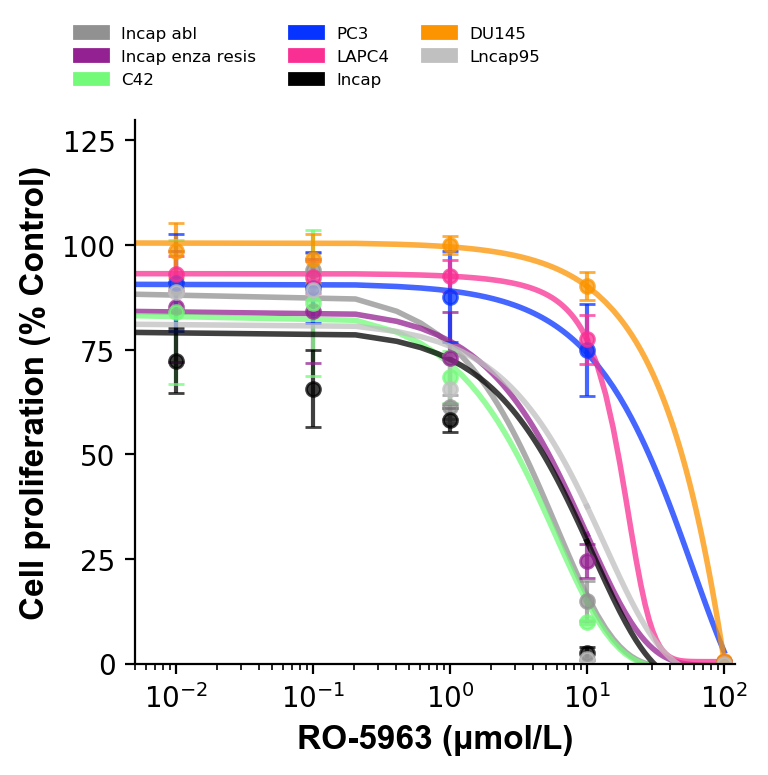

In [23]:
from scipy.stats import sem
from sklearn import preprocessing

fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(5,4), dpi=200)



def sigmoid(x, L ,x0, k, b):
    y = L / (1. + np.exp(-k*(x-x0)))+b
    return (y)




# exps =['lncap']
exps= list(set(df.columns))
# exps.remove('PC3')
# exps =['DU145'] 
X= df.index.values
# X=[100,10,1,0.1,0.01]
legend_labels=[]
legnds=[]
for i, exp in enumerate(exps):
    print exp
    legend_labels.append(exp)
    df_exp = df.loc[X,exp].copy()    
    x = df_exp.values #returns a numpy array
    x_scaled= x
    stdv = x_scaled.std(axis=1)
    mean = x_scaled.mean(axis=1)
    ydata=df_exp.values.flatten()
    X= X.astype(float) 
    n_repeats = df_exp.shape[1]
    xdata = np.repeat(X, n_repeats)
    xdata= xdata.astype(float) 
    ydata= ydata.astype(float)


    p0 = [max(ydata), np.mean(xdata),-.5,min(ydata)] # this is an mandatory initial guess
    popt, pcov = curve_fit(sigmoid, xdata, ydata,p0, method='dogbox',maxfev=100000)
    
    plt.errorbar(X,mean,yerr=stdv,fmt='o',ms=5,color=colors[exp],alpha=0.75,capsize=3, label=exp)
    x2= np.linspace((min(xdata), max(xdata)), 10)
    y2 = sigmoid( x2, *popt)
    plt.plot(x2,y2,color=colors[exp],alpha=0.75, linewidth=2)

    legnds.append(mpatches.Patch(color=colors[exp], label=exp))

plt.xscale('log')
# plt.ylim((-.6, 1.6))
plt.subplots_adjust(left=0.2, bottom=0.2, right=0.8)
plt.ylabel('Cell proliferation (% Control)',fontdict=dict(family='Arial', weight='bold', fontsize=12) )
plt.xlabel(u'RO-5963 (\u03bcmol/L)',fontdict=dict(family='Arial', weight='bold', fontsize=12) )
ax.spines['bottom'].set_position(('data',  0.))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.yticks([0, 25, 50, 75, 100, 125])
plt.xlim((.005,120))
plt.ylim((.0,130))
# ax.legend( handles=legnds,  framealpha=0.0, loc='upper center', ncol=3, prop={'size': 6})
ax.legend( handles=legnds,  framealpha=0.0, bbox_to_anchor=(.7, 1.2), ncol=3, prop={'size': 6})


plt.savefig('drug1.png', dpi=200)
# ax.legend( handles=legnds, bbox_to_anchor=(.9, 1.), framealpha=0.0, loc='upper center')